In [1]:
from ema_workbench import (MultiprocessingEvaluator,SequentialEvaluator, ema_logging, save_results, load_results)
from SALib.analyze import sobol
from ema_workbench.em_framework.evaluators import SOBOL
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_problem_definitions import ema_problem

In [2]:
# enable logging
ema_logging.LOG_FORMAT = '%(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [3]:
# import problem definition
model = ema_problem(2)

In [17]:
with MultiprocessingEvaluator(model, n_processes=8) as evaluator:
    experiment_SOBOL, outcomes_SOBOL = evaluator.perform_experiments(scenarios = 650, uncertainty_sampling=SOBOL)

pool started
performing 5200 scenarios * 1 policies * 1 model(s) = 5200 experiments
terminating pool
Process ForkPoolWorker-71:
Process ForkPoolWorker-67:
Process ForkPoolWorker-68:
Process ForkPoolWorker-69:
Process ForkPoolWorker-66:
Process ForkPoolWorker-70:
Process ForkPoolWorker-65:
Process ForkPoolWorker-72:


KeyboardInterrupt: 

In [5]:
# prepare SOBOL from results
def get_sobol_results(variable):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes_SOBOL[variable],
                    calc_second_order=True, print_to_console=False)
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)4, 25
    plt.show()

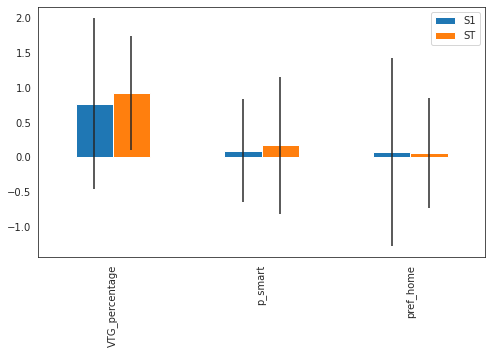

In [11]:
get_sobol_results('mean_VTG_capacity')

In [ ]:
pd.DataFrame(experiment_SOBOL)

In [ ]:
sobol_results = save_results((experiment_SOBOL, outcomes_SOBOL), '../data/ema/sobol_results.tar.gz')

In [ ]:
experiment_SOBOL, outcomes_SOBOL = load_results('sobol_results.tar.gz')